In [13]:
import pandas as pd

def load_data(file_path):

    return pd.read_csv(file_path)




In [14]:
def clean_data(df):

    # Renaming columns to match expected names
    df.columns = ['EmployeeID', 'FirstName', 'LastName', 'Department', 'Date of Hire', 'Salary', 'Employment Type']

    # Combining FirstName and LastName into a single Name column
    df['Name'] = df['FirstName'] + ' ' + df['LastName']

    # Dropping the now redundant FirstName and LastName columns
    df = df.drop(columns=['FirstName', 'LastName', 'Employment Type'])

    # Rearranging columns to match the required format
    df = df[['EmployeeID', 'Name', 'Date of Hire', 'Department', 'Salary']]

    # Handling missing values by filling with appropriate defaults or dropping
    df = df.dropna(subset=['EmployeeID', 'Name', 'Date of Hire', 'Department', 'Salary'])

    # Converting data types
    df['EmployeeID'] = df['EmployeeID'].astype(str)
    df['Date of Hire'] = pd.to_datetime(df['Date of Hire'], dayfirst=False, errors='coerce')
    df['Salary'] = df['Salary'].astype(float)

    return df



In [15]:
# Load the data
file_path = '/mnt/data/employees.csv'
employees_df = load_data(file_path)

# Display the loaded DataFrame for troubleshooting
print(employees_df.head())





       148  Unnamed: 1  Unnamed: 2         Unnamed: 3 Unnamed: 4  Unnamed: 5  \
0  1234567       Emily     Johnson                 IT  4/10/2018       58000   
1  2345678   Alexander   Kuznetsov                 HR  8/21/2021       46000   
2  3456789         Mia        Wong          Logistics  1/30/2019       49000   
3  4567890        Noah      Miller   Customer Service  3/15/2022       41000   
4  5678901    Isabella       Rossi                 IT  5/22/2017       54000   

  Unnamed: 6  
0  FULL_TIME  
1  PART_TIME  
2  FULL_TIME  
3  PART_TIME  
4  FULL_TIME  


In [16]:
# Clean the data
cleaned_employees_df = clean_data(employees_df)

# Display the cleaned DataFrame for troubleshooting
print(cleaned_employees_df.head())





  EmployeeID                   Name Date of Hire         Department   Salary
0    1234567         Emily  Johnson   2018-04-10                 IT  58000.0
1    2345678   Alexander  Kuznetsov   2021-08-21                 HR  46000.0
2    3456789              Mia  Wong   2019-01-30          Logistics  49000.0
3    4567890           Noah  Miller   2022-03-15   Customer Service  41000.0
4    5678901        Isabella  Rossi   2017-05-22                 IT  54000.0


In [17]:
# Display unique department names in the DataFrame
print(cleaned_employees_df['Department'].unique())


[' IT' ' HR' ' Logistics' ' Customer Service']


In [18]:
def calculate_average_salary(df, department):

    # Strip whitespace from the department names
    df['Department'] = df['Department'].str.strip()

    # Filter the DataFrame for the specified department
    department_df = df[df['Department'] == department]

    # Calculate the average salary
    average_salary = department_df['Salary'].mean()

    return average_salary

# Example usage
department_name = "IT"  # Ensure this matches one of the unique department names exactly
average_salary = calculate_average_salary(cleaned_employees_df, department_name)
print(f"The average salary in the {department_name} department is {average_salary:.2f}")


The average salary in the IT department is 68000.00


In [19]:
import pandas as pd

def calculate_experience(df):

    current_date = pd.to_datetime("today")
    df['Experience'] = (current_date - df['Date of Hire']).dt.days / 365.25
    return df

def find_employees_with_experience(df, years):

    # Calculate the experience of each employee
    df = calculate_experience(df)

    # Filter the DataFrame for employees with experience >= specified years
    experienced_employees = df[df['Experience'] >= years]

    # Return the list of employee names
    return experienced_employees['Name'].tolist()

# Example usage
years_of_experience = 2
experienced_employees_list = find_employees_with_experience(cleaned_employees_df, years_of_experience)
print(f"Employees with at least {years_of_experience} years of experience: {experienced_employees_list}")


Employees with at least 2 years of experience: [' Emily  Johnson', ' Alexander  Kuznetsov', ' Mia  Wong', ' Noah  Miller', ' Isabella  Rossi', ' Liam  Hernandez', ' Sofia  Kim', ' Mason  Dubois', ' Ava  Kovak', ' William  Garcia', ' Abigail  Yamamoto', ' Madison  da Silva']


In [21]:
def get_department_statistics(df):


    # Calculate the experience of each employee
    df = calculate_experience(df)

    # Initialize the dictionary to store statistics
    department_stats = {}

    # Get unique department names
    departments = df['Department'].unique()

    # Calculate average salary and experience for each department
    for department in departments:
        department_df = df[df['Department'] == department]
        average_salary = department_df['Salary'].mean()
        average_experience = department_df['Experience'].mean()
        department_stats[department] = {
            'Average Salary': average_salary,
            'Average Experience': average_experience
        }

    return department_stats

# Example usage
department_statistics = get_department_statistics(cleaned_employees_df)
print("Department Statistics:")
for department, stats in department_statistics.items():
    print(f"{department}: {stats}")


Department Statistics:
IT: {'Average Salary': 68000.0, 'Average Experience': 6.346338124572211}
HR: {'Average Salary': 58789.47368421053, 'Average Experience': 3.454255076431668}
Logistics: {'Average Salary': 48166.666666666664, 'Average Experience': 5.698380104950947}
Customer Service: {'Average Salary': 43583.333333333336, 'Average Experience': 2.3928815879534566}


In [32]:
# Creating employee_analysis.py
module_code = """
import pandas as pd

def load_data(file_path):
    \"""
    Loads the CSV file into a pandas DataFrame.

    Parameters:
    file_path (str): The path to the CSV file.

    Returns:
    pd.DataFrame: The loaded DataFrame.
    \"""
    return pd.read_csv(file_path)

def clean_data(df):
    \"""
    Cleans the data by handling missing values and ensuring appropriate data types.

    Parameters:
    df (pd.DataFrame): The DataFrame to clean.

    Returns:
    pd.DataFrame: The cleaned DataFrame.
    \"""
    # Renaming columns to match expected names
    df.columns = ['EmployeeID', 'FirstName', 'LastName', 'Department', 'Date of Hire', 'Salary', 'Employment Type']

    # Combining FirstName and LastName into a single Name column
    df['Name'] = df['FirstName'] + ' ' + df['LastName']

    # Dropping the now redundant FirstName, LastName, and Employment Type columns
    df = df.drop(columns=['FirstName', 'LastName', 'Employment Type'])

    # Rearranging columns to match the required format
    df = df[['EmployeeID', 'Name', 'Date of Hire', 'Department', 'Salary']]

    # Handling missing values by filling with appropriate defaults or dropping
    df = df.dropna(subset=['EmployeeID', 'Name', 'Date of Hire', 'Department', 'Salary'])

    # Converting data types
    df['EmployeeID'] = df['EmployeeID'].astype(str)
    df['Date of Hire'] = pd.to_datetime(df['Date of Hire'], dayfirst=False, errors='coerce')
    df['Salary'] = df['Salary'].astype(float)

    return df

def calculate_average_salary(df, department):
    \"""
    Calculates the average salary of employees in a specific department.

    Parameters:
    df (pd.DataFrame): The DataFrame containing employee data.
    department (str): The name of the department.

    Returns:
    float: The average salary of employees in the specified department.
    \"""
    # Strip whitespace from the department names
    df['Department'] = df['Department'].str.strip()

    # Filter the DataFrame for the specified department
    department_df = df[df['Department'] == department]

    # Calculate the average salary
    average_salary = department_df['Salary'].mean()

    return average_salary

def calculate_experience(df):
    \"""
    Calculates the experience of each employee based on the 'Date of Hire'.

    Parameters:
    df (pd.DataFrame): The DataFrame containing employee data.

    Returns:
    pd.DataFrame: The DataFrame with an added 'Experience' column.
    \"""
    current_date = pd.to_datetime("today")
    df['Experience'] = (current_date - df['Date of Hire']).dt.days / 365.25
    return df

def find_employees_with_experience(df, years):
    \"""
    Finds employees with experience greater than or equal to the specified number of years.

    Parameters:
    df (pd.DataFrame): The DataFrame containing employee data.
    years (int): The number of years of experience.

    Returns:
    list: A list of names of employees with experience greater than or equal to the specified years.
    \"""
    # Calculate the experience of each employee
    df = calculate_experience(df)

    # Filter the DataFrame for employees with experience >= specified years
    experienced_employees = df[df['Experience'] >= years]

    # Return the list of employee names
    return experienced_employees['Name'].tolist()

def get_department_statistics(df):
    \"""
    Returns a dictionary with department names as keys and their respective average salaries and average experiences as values.

    Parameters:
    df (pd.DataFrame): The DataFrame containing employee data.

    Returns:
    dict: A dictionary with department names as keys and their respective average salaries and average experiences as values.
    \"""
    # Calculate the experience of each employee
    df = calculate_experience(df)

    # Initialize the dictionary to store statistics
    department_stats = {}

    # Get unique department names
    departments = df['Department'].unique()

    # Calculate average salary and experience for each department
    for department in departments:
        department_df = df[df['Department'] == department]
        average_salary = department_df['Salary'].mean()
        average_experience = department_df['Experience'].mean()
        department_stats[department] = {
            'Average Salary': average_salary,
            'Average Experience': average_experience
        }

    return department_stats
"""

with open("employee_analysis.py", "w") as file:
    file.write(module_code)



In [33]:
# main_script.py

import employee_analysis as ea

# Load the data
file_path = '/mnt/data/employees.csv'
employees_df = ea.load_data(file_path)

# Clean the data
cleaned_employees_df = ea.clean_data(employees_df)

# Calculate the average salary in a specific department
department_name = "IT"
average_salary = ea.calculate_average_salary(cleaned_employees_df, department_name)
print(f"The average salary in the {department_name} department is {average_salary:.2f}")

# Find employees with a specified number of years of experience
years_of_experience = 2
experienced_employees_list = ea.find_employees_with_experience(cleaned_employees_df, years_of_experience)
print(f"Employees with at least {years_of_experience} years of experience: {experienced_employees_list}")

# Get department statistics
department_statistics = ea.get_department_statistics(cleaned_employees_df)
print("Department Statistics:")
for department, stats in department_statistics.items():
    print(f"{department}: {stats}")


The average salary in the IT department is 68000.00
Employees with at least 2 years of experience: [' Emily  Johnson', ' Alexander  Kuznetsov', ' Mia  Wong', ' Noah  Miller', ' Isabella  Rossi', ' Liam  Hernandez', ' Sofia  Kim', ' Mason  Dubois', ' Ava  Kovak', ' William  Garcia', ' Abigail  Yamamoto', ' Madison  da Silva']
Department Statistics:
IT: {'Average Salary': 68000.0, 'Average Experience': 6.346338124572211}
HR: {'Average Salary': 58789.47368421053, 'Average Experience': 3.454255076431668}
Logistics: {'Average Salary': 48166.666666666664, 'Average Experience': 5.698380104950947}
Customer Service: {'Average Salary': 43583.333333333336, 'Average Experience': 2.3928815879534566}


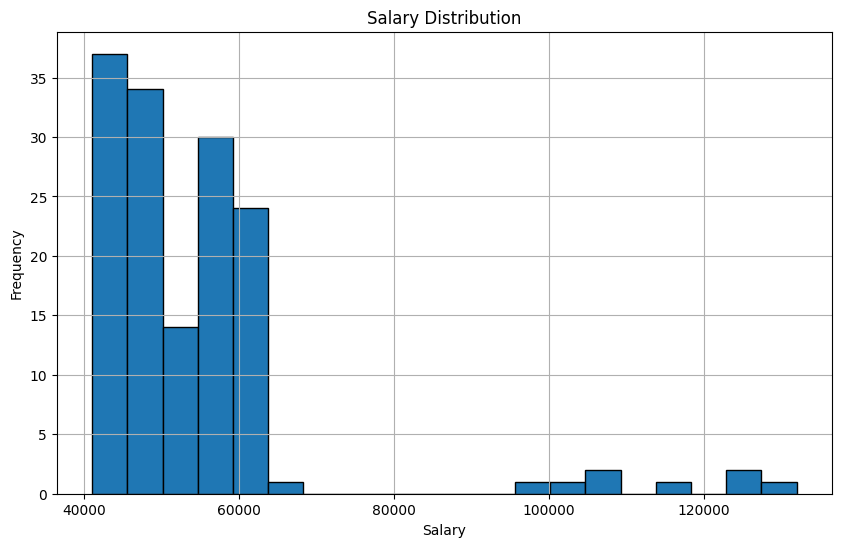

In [34]:
import matplotlib.pyplot as plt

def plot_salary_distribution(df):
    """
    Plots the distribution of salaries using a histogram.

    Parameters:
    df (pd.DataFrame): The DataFrame containing employee data.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(df['Salary'], bins=20, edgecolor='black')
    plt.title('Salary Distribution')
    plt.xlabel('Salary')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Example usage
plot_salary_distribution(cleaned_employees_df)


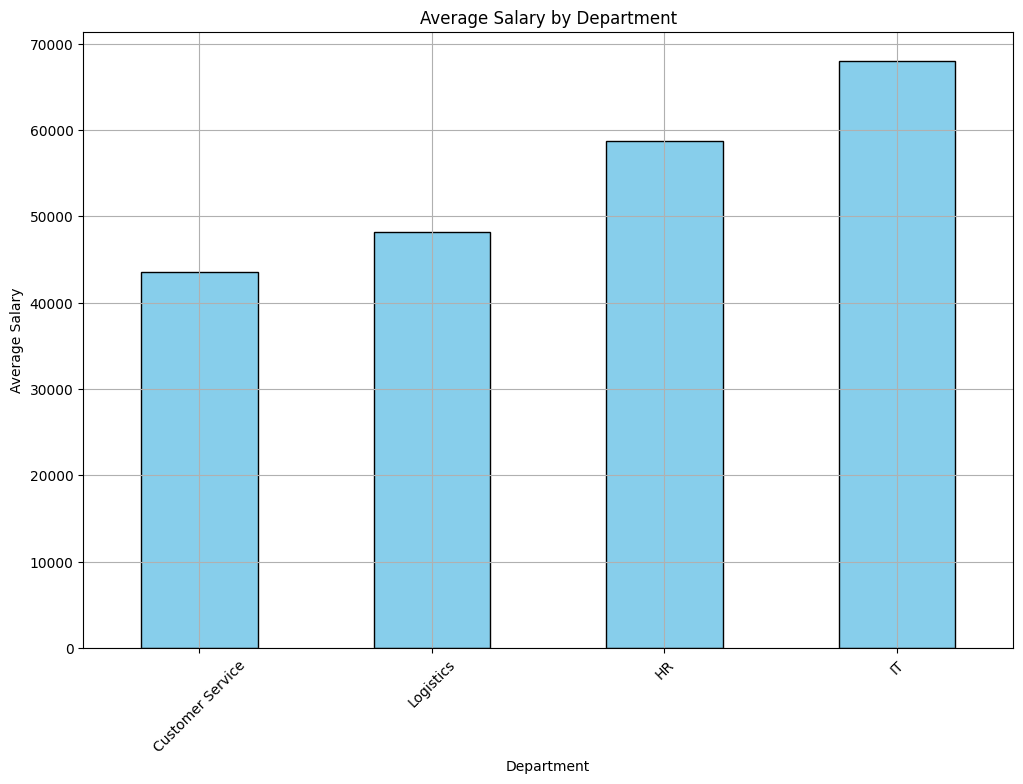

In [ ]:
import matplotlib.pyplot as plt

def plot_average_salary_by_department(df):
    """
    Plots the average salary by department using a bar chart.

    Parameters:
    df (pd.DataFrame): The DataFrame containing employee data.
    """
    # Strip whitespace from the department names
    df['Department'] = df['Department'].str.strip()

    # Calculate the average salary for each department
    avg_salary_by_dept = df.groupby('Department')['Salary'].mean().sort_values()

    # Plotting the bar chart
    plt.figure(figsize=(12, 8))
    avg_salary_by_dept.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Average Salary by Department')
    plt.xlabel('Department')
    plt.ylabel('Average Salary')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Example usage
plot_average_salary_by_department(cleaned_employees_df)


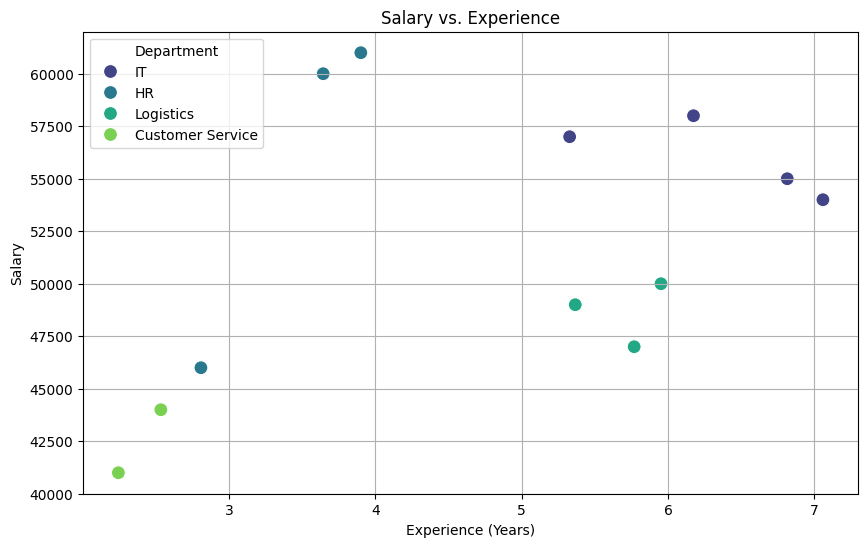

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_salary_vs_experience(df):
    """
    Plots a scatter plot of salary vs. experience using Seaborn.

    Parameters:
    df (pd.DataFrame): The DataFrame containing employee data.
    """
    # Calculate experience if not already done
    if 'Experience' not in df.columns:
        df = calculate_experience(df)

    # Plotting the scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Experience', y='Salary', hue='Department', palette='viridis', s=100)
    plt.title('Salary vs. Experience')
    plt.xlabel('Experience (Years)')
    plt.ylabel('Salary')
    plt.grid(True)
    plt.show()

# Example usage
plot_salary_vs_experience(cleaned_employees_df)


In [ ]:
import plotly.express as px

def plot_age_distribution_by_department(df):
    """
    Plots the distribution of ages for each department using a box plot with Plotly.

    Parameters:
    df (pd.DataFrame): The DataFrame containing employee data.
    """
    # Calculate experience if not already done
    if 'Experience' not in df.columns:
        df = calculate_experience(df)

    # Create the box plot
    fig = px.box(df, x='Department', y='Experience', points="all", title="Age Distribution by Department")
    fig.update_layout(xaxis_title="Department", yaxis_title="Experience (Years)", boxmode='group')

    # Show the plot
    fig.show()

# Example usage
plot_age_distribution_by_department(cleaned_employees_df)
